In [ ]:
###---------------
# Project HIA302 Group B 
# Isaac Kong
# Vax 
###----------------

In [ ]:

"""
Data description 
1) [`vax_malaysia.csv`](/vaccination/vax_malaysia.csv): Vaccinations (daily and cumulative, by dose type and brand) at country level.
2) [`vax_state.csv`](/vaccination/vax_state.csv): Vaccinations (daily and cumulative, by dose type and brand) at state level.
3) [`vax_district.csv`](/vaccination/vax_district.csv): Vaccinations (daily and cumulative, by dose type and brand) at district level.
4) [`vax_school.csv`](/vaccination/vax_school.csv): Vaccination coverage for public schools.
5) [`vax_demog_age.csv`'](/vaccination/vax_demog_age.csv): Vaccinations by age group, at district level.
6) [`vax_demog_age_children.csv`'](/vaccination/vax_demog_age_children.csv): Vaccinations by age group with single-year granularity for individuals < 18yo, at district level.
7) [`vax_demog_sex.csv`'](/vaccination/vax_demog_sex.csv): Vaccinations by sex, at district level.
8) [`vax_demog_ethnicity.csv`'](/vaccination/vax_demog_ethnicity.csv): Vaccinations by ethnicity, at district level.
9) [`vax_demog_nationality.csv`'](/vaccination/vax_demog_nationality.csv): Vaccinations by nationality, at district level.
10) [`vax_demog_highrisk.csv`'](/vaccination/vax_demog_highrisk.csv): Vaccinations for special categories (healthcare workers, OKU, individuals with comorbidities) at district level.
"""

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os, sys

In [2]:
data_path="vaccination/"


vax_files = os.listdir(data_path)
vax_files

['vax_district.csv',
 'vax_booster_combos.csv',
 'vax_demog_ethnicity.csv',
 'aefi.csv',
 'vax_outcomes_capita.csv',
 'vax_demog_highrisk.csv',
 'vax_demog_sex.csv',
 'vax_malaysia.csv',
 'README.md',
 'vax_state.csv',
 'aefi_serious.csv',
 'vax_demog_nationality.csv',
 'vax_snapshot.csv',
 '.ipynb_checkpoints',
 'vax_demog_age_children.csv',
 'vax_school.csv',
 'vax_demog_age.csv']

In [4]:
filename, filext = os.path.splitext(vax_files[0])

filext

if(filext == '.csv'):
    print('this is a CSV')
    
filename

this is a CSV


'vax_district'

In [5]:
pd.read_csv(os.path.join(data_path, "vax_district.csv")).head()
pd.read_csv(os.path.join(data_path, "vax_district.csv")).head()

,date,state,district,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2021-02-24,Johor,Batu Pahat,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Johor,Johor Bahru,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Johor,Kluang,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Johor,Kota Tinggi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Johor,Kulai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
### Create data repository holiding all datasets for vacincations 

data_repo = dict()

for file in vax_files:
    file_path = os.path.join(data_path, file)
    filename, filext = os.path.splitext(file)

    if(filext == ".csv"):
        print(file_path)
        tmp_df = pd.read_csv(file_path)
        data_repo[filename] = tmp_df.copy()
        
data_repo.keys()

vaccination/vax_district.csv
vaccination/vax_booster_combos.csv
vaccination/vax_demog_ethnicity.csv
vaccination/aefi.csv
vaccination/vax_outcomes_capita.csv
vaccination/vax_demog_highrisk.csv
vaccination/vax_demog_sex.csv
vaccination/vax_malaysia.csv
vaccination/vax_state.csv
vaccination/aefi_serious.csv
vaccination/vax_demog_nationality.csv
vaccination/vax_snapshot.csv
vaccination/vax_demog_age_children.csv
vaccination/vax_school.csv
vaccination/vax_demog_age.csv


dict_keys(['vax_district', 'vax_booster_combos', 'vax_demog_ethnicity', 'aefi', 'vax_outcomes_capita', 'vax_demog_highrisk', 'vax_demog_sex', 'vax_malaysia', 'vax_state', 'aefi_serious', 'vax_demog_nationality', 'vax_snapshot', 'vax_demog_age_children', 'vax_school', 'vax_demog_age'])

In [72]:
aefi = data_repo['aefi'].copy()

aefi_serious = data_repo['aefi_serious'].copy()

print(aefi.info())
print(aefi_serious.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         1521 non-null   object
 1   vaxtype                      1521 non-null   object
 2   daily_total                  1521 non-null   int64 
 3   daily_serious_npra           1521 non-null   int64 
 4   daily_nonserious             1521 non-null   int64 
 5   daily_nonserious_npra        1521 non-null   int64 
 6   daily_nonserious_mysj_dose1  1521 non-null   int64 
 7   daily_nonserious_mysj_dose2  1521 non-null   int64 
 8   d1_site_pain                 1521 non-null   int64 
 9   d1_site_swelling             1521 non-null   int64 
 10  d1_site_redness              1521 non-null   int64 
 11  d1_tiredness                 1521 non-null   int64 
 12  d1_headache                  1521 non-null   int64 
 13  d1_muscle_pain               1521

In [73]:
aefi_full = aefi_serious.merge(aefi, on=['date', 'vaxtype'], how='right')
aefi_full

,date,vaxtype,suspected_anaphylaxis,acute_facial_paralysis,venous_thromboembolism,myo_pericarditis,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,NaN,NaN,NaN,NaN,5,0,5,5,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,NaN,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,NaN,NaN,NaN,NaN,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,NaN,NaN,NaN,NaN,4,0,4,4,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,NaN,NaN,NaN,NaN,12,1,11,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,NaN,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,NaN,NaN,NaN,NaN,3,0,3,1,...,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#data wrangling step 1
# dose 1
aefi_ref = aefi_full[["date" , "vaxtype"]]

filter_col_d1 = [col for col in aefi_full if col.startswith('d1_')]
filter_col_d1

aefi_dose1 = aefi_full.loc[:, aefi_full.columns.str.startswith("d1_")]

aefi_dose1_final = pd.concat([aefi_ref,aefi_dose1],axis=1)
aefi_dose1_final 

# dose 2
aefi_ref = aefi_full[["date" , "vaxtype"]]

filter_col_d2 = [col for col in aefi_full if col.startswith('d2_')]
filter_col_d2

aefi_dose2 = aefi_full.loc[:, aefi_full.columns.str.startswith("d2_")]

aefi_dose2_final = pd.concat([aefi_ref,aefi_dose2],axis=1)
aefi_dose2_final



,date,vaxtype,d2_site_pain,d2_site_swelling,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,0,0,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,1,1,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# dose 1
aefi_dose1_l = pd.wide_to_long(aefi_dose1_final, stubnames='d1', i=['date', 'vaxtype'], j='AE', sep="_", suffix=r'\w+')
aefi_dose1_l.rename(columns = {'d1':'count'}, inplace = True)
# 
aefi_dose1_l["dose"]=1
aefi_dose1_l

# dose 2
aefi_dose2_l = pd.wide_to_long(aefi_dose2_final, stubnames='d2', i=['date', 'vaxtype'], j='AE', sep="_", suffix=r'\w+')
aefi_dose2_l.rename(columns = {'d2':'count'}, inplace = True)
# 
aefi_dose2_l["dose"]=2
aefi_dose2_l

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     2
                       site_swelling      0     2
                       site_redness       0     2
                       tiredness          0     2
                       headache           0     2
...                                     ...   ...
2022-06-07 sinovac     weakness           0     2
                       fever              0     2
                       vomiting           0     2
                       chills             0     2
                       rash               0     2

[18252 rows x 2 columns]

<AxesSubplot:ylabel='count'>

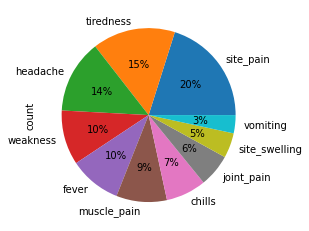

In [59]:
# dose1 Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose1_summ = aefi_dose1_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose1_summ.plot(kind='pie', y='count', autopct='%1.0f%%')

<AxesSubplot:ylabel='count'>

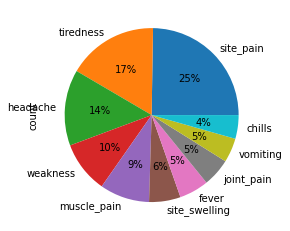

In [60]:
# dose 2 Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose2_summ = aefi_dose2_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose2_summ.plot(kind='pie', y='count', autopct='%1.0f%%')

In [62]:
# dose 1 concatinate with dose 2 dataframe
aefi_dose12_final = pd.concat([aefi_dose1_l,aefi_dose2_l],axis=0)
aefi_dose12_final

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     1
                       site_swelling      0     1
                       site_redness       0     1
                       tiredness          0     1
                       headache           0     1
...                                     ...   ...
2022-06-07 sinovac     weakness           0     2
                       fever              0     2
                       vomiting           0     2
                       chills             0     2
                       rash               0     2

[36504 rows x 2 columns]

<AxesSubplot:xlabel='vaxtype'>

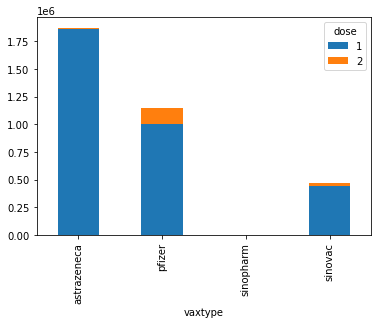

In [69]:
# barchart by vaccine brand
vaxtype_summ_ae = aefi_dose12_final.groupby(['vaxtype', 'dose'])['count'].sum().unstack().plot(kind='bar', stacked=True)
vaxtype_summ_ae

<AxesSubplot:ylabel='count'>

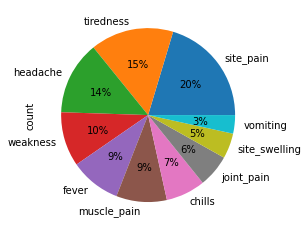

In [70]:
# regardless of dose (SAE inclusive) Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose12_summ = aefi_dose12_final.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose12_summ.plot(kind='pie', y='count', autopct='%1.0f%%')

<AxesSubplot:ylabel='count'>

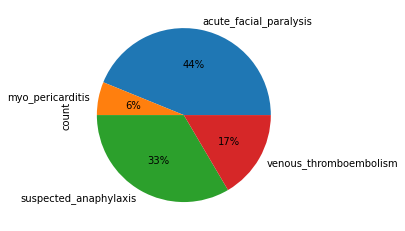

In [84]:
# Serious AE 
# aefi_serious = aefi_full[['date','vaxtype','suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis']]
aefi_serious
aefi_serious_l = pd.melt(aefi_serious, id_vars= ['date','vaxtype'], value_vars=['suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis'])

aefi_serious_l.rename(columns = {'value':'count','variable':'AE'}, inplace = True)
aefi_serious_l

aefi_serious_l_summ_pie = aefi_serious_l.groupby(['AE'])['count'].sum()
aefi_serious_l_summ_pie.plot(kind='pie', y='count', autopct='%1.0f%%')


<AxesSubplot:xlabel='date'>

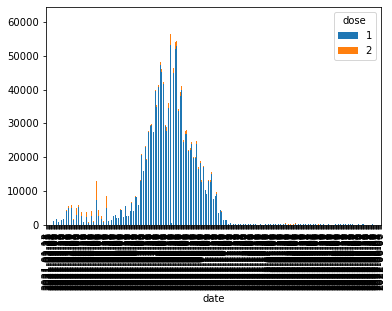

In [88]:
# barchart by vaccine brand
aefi_by_time = aefi_dose12_final.groupby(['date', 'dose'])['count'].sum().unstack().plot(kind='bar', stacked=True)
aefi_by_time

In [ ]:
# barchart by date
aefi_serious_l_summ_bar = aefi_serious_l.groupby(['vaxtype', 'AE'])['count'].sum().unstack().plot(kind='bar', stacked=True)
aefi_serious_l_summ_bar

In [ ]:
# aefi.merge(aefi_serious, on=['date', 'vaxtype'], how='left')

In [199]:
aefi.describe().loc['min'] < 0
aefi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         1521 non-null   object
 1   vaxtype                      1521 non-null   object
 2   daily_total                  1521 non-null   int64 
 3   daily_serious_npra           1521 non-null   int64 
 4   daily_nonserious             1521 non-null   int64 
 5   daily_nonserious_npra        1521 non-null   int64 
 6   daily_nonserious_mysj_dose1  1521 non-null   int64 
 7   daily_nonserious_mysj_dose2  1521 non-null   int64 
 8   d1_site_pain                 1521 non-null   int64 
 9   d1_site_swelling             1521 non-null   int64 
 10  d1_site_redness              1521 non-null   int64 
 11  d1_tiredness                 1521 non-null   int64 
 12  d1_headache                  1521 non-null   int64 
 13  d1_muscle_pain               1521

In [178]:
# for key, value in data_repo.items():
#     print(key, value.shape, value.isna().any().all() )
#     new_value = value.dropna()    
# #     tmp_cond = (new_value.describe().loc['min'] < 0)
# #     negative_vals_cols = tmp_cond[tmp_cond==True].index.to_list()
# #     tmp = new_value[negative_vals_cols]
# #     tmp_index = tmp[tmp[negative_vals_cols] < 0].index
# #     print(new_value.iloc[tmp_index])

#     # new_value = new_value.iloc[~tmp_index]
#     # print(value.info())

In [201]:
aefi_serious['date'] = pd.to_datetime(aefi_serious['date'])

aefi_serious.dtypes

date                      datetime64[ns]
vaxtype                           object
suspected_anaphylaxis              int64
acute_facial_paralysis             int64
venous_thromboembolism             int64
myo_pericarditis                   int64
dtype: object

In [206]:

 # + '-' + aefi_serious['date'].dt.month
aefi_serious['date_year'] = aefi_serious['date'].dt.year
aefi_serious['date_year'] = aefi_serious['date_year'].astype('str')
aefi_serious['date_month'] = aefi_serious['date'].dt.month
aefi_serious['date_month'] = aefi_serious['date_month'].astype('str')



0      2021-5
1      2021-5
2      2021-5
3      2021-5
4      2021-8
5      2021-8
6      2021-8
7      2021-8
8      2021-9
9      2021-9
10     2021-9
11     2021-9
12    2021-10
13    2021-10
14    2021-10
15    2021-10
16    2021-11
17    2021-11
18    2021-11
19    2021-11
dtype: object

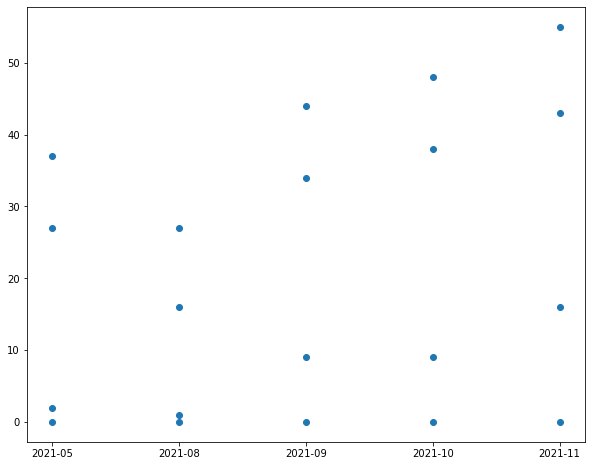

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

aefi_serious['date_year_month'] = aefi_serious['date_year'] + '-' + aefi_serious['date_month']

aefi_serious['date_year_month'] = pd.to_datetime(aefi_serious['date_year_month'], format='%Y-%m').dt.strftime('%Y-%m')
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot_date(aefi_serious['date_year_month'], aefi_serious['acute_facial_paralysis'])
plt.show()

In [120]:
# value.columns[(value.describe().loc['min'] < 0)]


['daily_booster', 'daily', 'pfizer3', 'pending3', 'pending4']

In [176]:
value

,date,state,district,aaa,aac,aah,aap,aas,ca,cc,...,ppc,pph,ppp,pps,ssa,ssc,ssh,ssp,sss,other
0,2021-09-01,Johor,Batu Pahat,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-09-01,Johor,Johor Bahru,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-09-01,Johor,Kluang,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-09-01,Johor,Kota Tinggi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-09-01,Johor,Kulai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72372,2022-12-05,Terengganu,Marang,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
72373,2022-12-05,Terengganu,Setiu,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72374,2022-12-05,W.P. Kuala Lumpur,Kuala Lumpur,0,0,0,3,0,0,0,...,0,0,23,4,0,0,0,4,1,0
72375,2022-12-05,W.P. Labuan,Labuan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
